# Project 6: Movie Recommendation Based on User Ratings 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# Load datasets
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
links = pd.read_csv('ml-latest-small/links.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')
print("Loaded datasets:" f"\n movies - {movies.shape}", f"\n ratings - {ratings.shape}",
      f"\n links - {links.shape}", f"\n tags - {tags.shape}",)

Loaded datasets:
 movies - (9742, 3) 
 ratings - (100836, 4) 
 links - (9742, 3) 
 tags - (3683, 4)


## Analyze the most popular movies based on average ratings. 

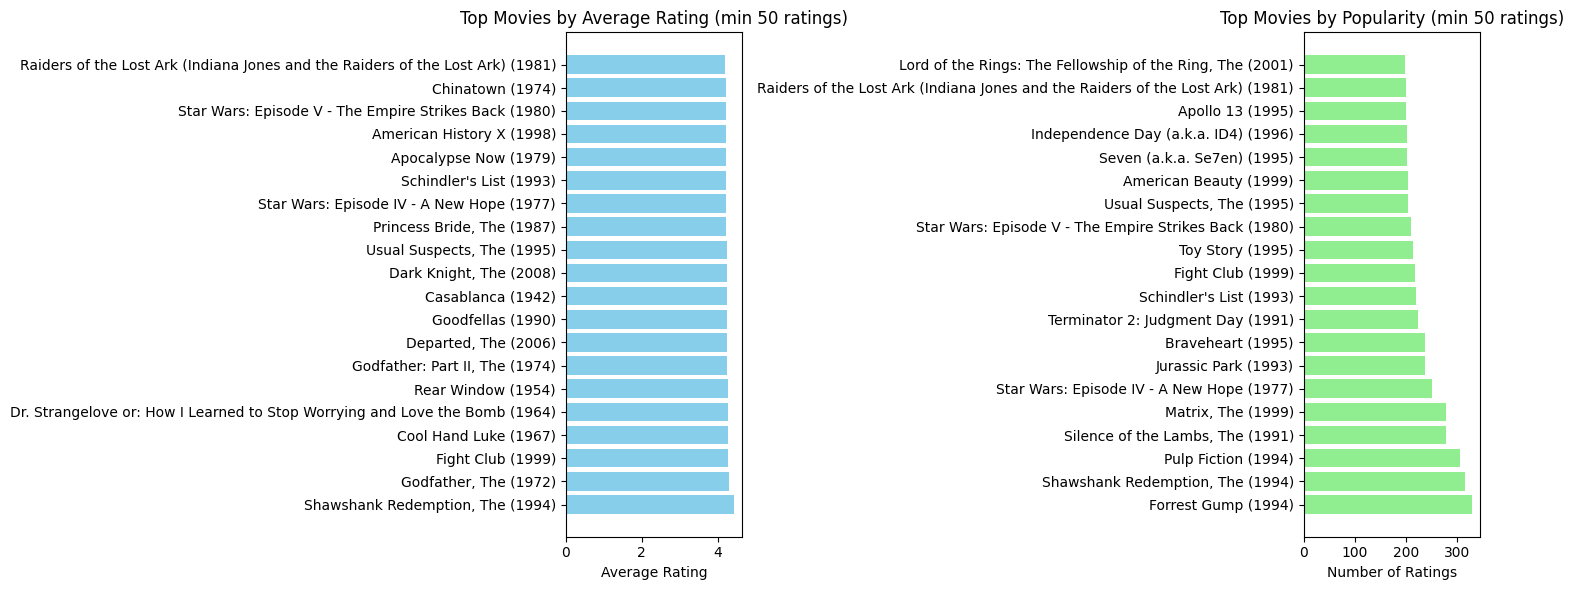

In [9]:
movie_stats = ratings.groupby('movieId').agg(avg_rating = ("rating", "mean"), n_ratings = ("rating", "size")).reset_index()
movies_scored = movies.merge(movie_stats, on='movieId', how='left')

min_ratings = 50

top_by_avg = (
    movies_scored.query('n_ratings >= @min_ratings')
    .sort_values(['avg_rating','n_ratings'], ascending=[False,False])
    .head(20)
)

top_by_popularity = (movies_scored.sort_values("n_ratings", ascending=False).head(20))

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.barh(top_by_avg['title'], top_by_avg['avg_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.title(f'Top Movies by Average Rating (min {min_ratings} ratings)')
plt.subplot(1, 2, 2)
plt.barh(top_by_popularity['title'], top_by_popularity['n_ratings'],
            color='lightgreen')
plt.xlabel('Number of Ratings')
plt.title(f'Top Movies by Popularity (min {min_ratings} ratings)')
plt.tight_layout()
plt.show()

## Group movies by genre and visualize the count of movies per genre. 

Top 10 genres by movie count:
      genres  count
0      Drama   4361
1     Comedy   3756
2   Thriller   1894
3     Action   1828
4    Romance   1596
5  Adventure   1263
6      Crime   1199
7     Sci-Fi    980
8     Horror    978
9    Fantasy    779


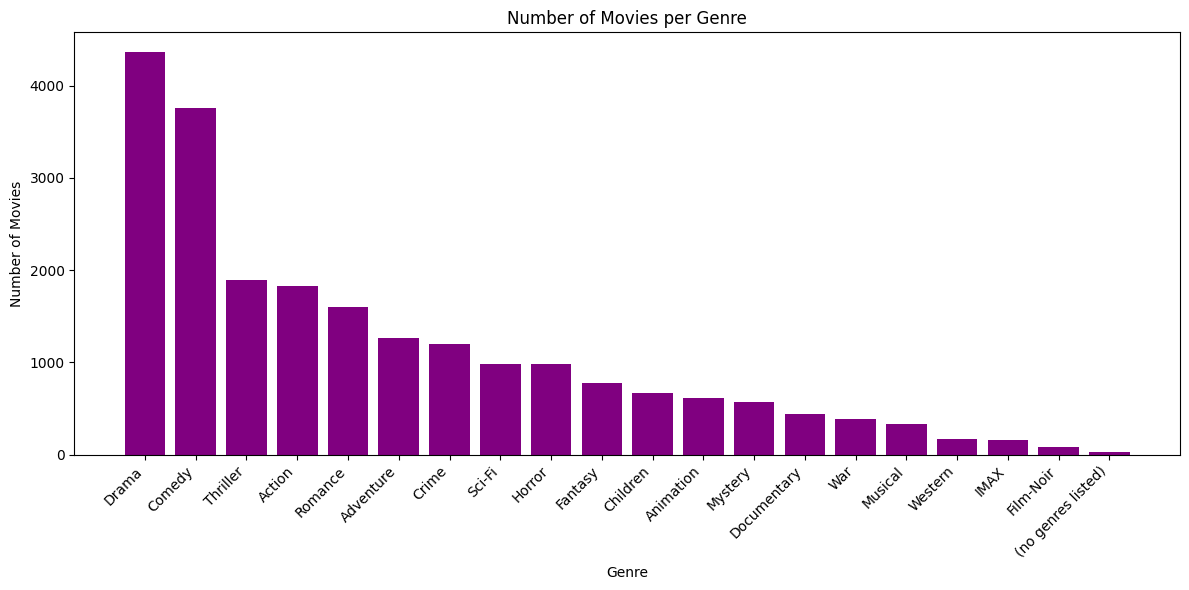

In [10]:
movies_exploded = movies.assign(genres=movies['genres'].str.split('|')).explode('genres').rename(columns={'genre_list': 'genre'})
genre_counts = movies_exploded.groupby('genres').size().sort_values(ascending=False).rename('count').reset_index()

print("Top 10 genres by movie count:")
print(genre_counts.head(10))

#Plot
plt.figure(figsize=(12, 6))
plt.bar(genre_counts['genres'], genre_counts['count'], color='purple')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()


## Recommend top-rated movies in a specific genre to users.

In [11]:
def recommend_by_genre(genre: str,top_n: int = 10, min_ratings: int = 50) -> pd.DataFrame:
    # attach stats to ecploded genre list
    scored = movies_exploded.merge(movie_stats, on='movieId', how='left')
    recs = (
        scored.query('genres == @genre and n_ratings >= @min_ratings')
        .sort_values(['avg_rating', 'n_ratings'], ascending=[False, False])
        .head(top_n)
        [['title', 'genres', 'avg_rating', 'n_ratings']]
        .reset_index(drop=True)
    )
    return recs

example_genre = 'Comedy'
print(f"\n=== Top {10} {example_genre} Movies (min {min_ratings} ratings) ===")
print(recommend_by_genre(example_genre, top_n=10, min_ratings=min_ratings).to_string(index=False))


=== Top 10 Comedy Movies (min 50 ratings) ===
                                                                      title genres  avg_rating  n_ratings
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) Comedy    4.268041       97.0
                                                 Princess Bride, The (1987) Comedy    4.232394      142.0
                                                        Pulp Fiction (1994) Comedy    4.197068      307.0
                       Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001) Comedy    4.183333      120.0
                                                        Forrest Gump (1994) Comedy    4.164134      329.0
                                     Monty Python and the Holy Grail (1975) Comedy    4.161765      136.0
                                                              Snatch (2000) Comedy    4.155914       93.0
                                 Life Is Beautiful (La Vita è bella) (1997) Comedy    4.147727       88.0